# Análisis de datos por países

Pretendemos estudiar ahora comparativamente los datos que han ido arrojando los distintos países y hacer una comparativa de sus curvas de contagios y fallecimientos.

Para ello haremos uso de un dataset encontrado en:
    
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,8)

In [3]:
ruta = 'Datos/Coronavirus_data.csv'
sep = ';'

date_parser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

datos = pd.read_csv(ruta, sep = sep, index_col = 'dateRep', parse_dates = ['dateRep'], date_parser = date_parser)

print(datos.describe())
print(datos.columns)
datos.head()

               day        month         year         cases       deaths  \
count  7904.000000  7904.000000  7904.000000   7904.000000  7904.000000   
mean     17.801240     2.304909  2019.991523     98.405617     4.715587   
std       8.721968     1.224986     0.091684    737.889417    42.903044   
min       1.000000     1.000000  2019.000000     -9.000000     0.000000   
25%      11.000000     1.000000  2020.000000      0.000000     0.000000   
50%      19.000000     2.000000  2020.000000      0.000000     0.000000   
75%      25.000000     3.000000  2020.000000      7.000000     0.000000   
max      31.000000    12.000000  2020.000000  21595.000000   971.000000   

        popData2018  
count  7.888000e+03  
mean   6.892717e+07  
std    2.099202e+08  
min    1.000000e+03  
25%    4.137309e+06  
50%    1.062716e+07  
75%    4.672375e+07  
max    1.392730e+09  
Index(['day', 'month', 'year', 'cases', 'deaths', 'countriesAndTerritories',
       'geoId', 'countryterritoryCode', 'popData2

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
dateRep,,,,,,,,,
2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
2020-03-30,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
2020-03-29,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
2020-03-28,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
2020-03-27,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0


In [4]:
datos.rename({'countriesAndTerritories':'countries'}, axis = 1, inplace = True)

In [5]:
len(datos['countries'].unique())

199

In [6]:
datos.sort_values(by = ['countries', 'dateRep'], ascending = [True, True], inplace = True)

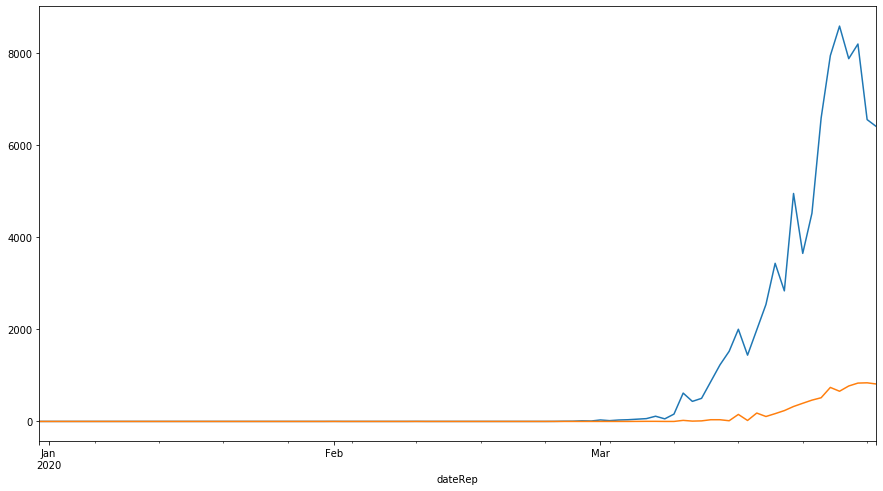

In [7]:
datos.loc[datos['countries'] == 'Spain', 'cases'].plot()
datos.loc[datos['countries'] == 'Spain', 'deaths'].plot()

In [8]:
datos[['tot_cases','tot_deaths']] = datos.groupby('countries')[['cases','deaths']].cumsum()

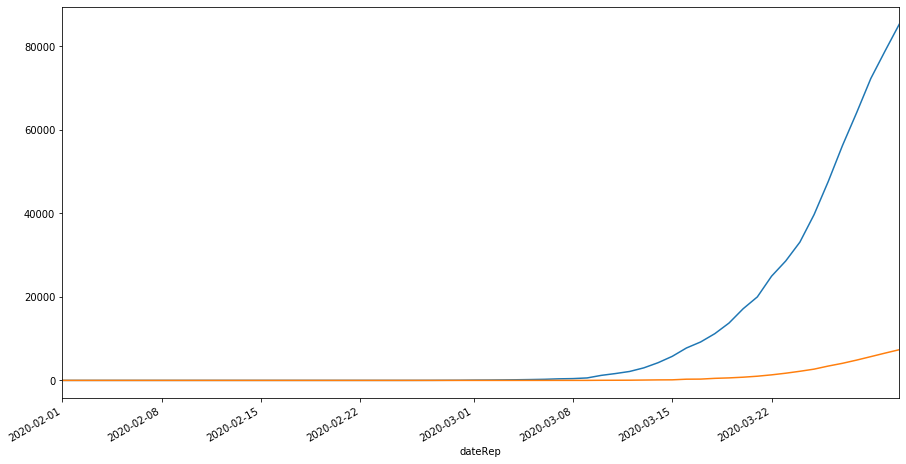

In [9]:
datos.loc[(datos['countries'] == 'Spain') & (datos['cases']>0), 'tot_cases'].plot()
datos.loc[(datos['countries'] == 'Spain') & (datos['cases']>0), 'tot_deaths'].plot()

In [10]:
datos[['ln_cases', 'ln_deaths', 'ln_tot_cases','ln_tot_deaths']] = datos[['cases','deaths', 'tot_cases', 'tot_deaths']].applymap(lambda x: np.log(x) if x > 0 else 0)

In [11]:
datos[['%_cases', '%_deaths', '%_tot_cases','%_tot_deaths']] = datos[['cases','deaths', 'tot_cases', 'tot_deaths']].pct_change().fillna(0)

In [12]:
datos.head()

,day,month,year,cases,deaths,countries,geoId,countryterritoryCode,popData2018,tot_cases,tot_deaths,ln_cases,ln_deaths,ln_tot_cases,ln_tot_deaths,%_cases,%_deaths,%_tot_cases,%_tot_deaths
dateRep,,,,,,,,,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,37172386.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,2,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,3,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,4,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
datos.to_csv('Datos/coronavirus_tratado.csv', sep = sep)